In [1]:
import numpy as np
import torch 
from collections import OrderedDict

from utils.train_n_test import TrainTest

from models.CNN_1D import CNN_1D

from utils.visuals import lagged_correlation
from utils.custom_loss import Balance, opportunity_loss
import matplotlib
import matplotlib.pyplot as plt

In [2]:
N = 10
FIX = True
PKL_NAME = 'expt48'

# MSE

In [ ]:
balance_params = {
    'START': 1e7, 
    'REWARD': 10, 
    'FINE': 100, 
    'NORM_HYPERPARAMS': (0,87000),
    'NORM': 'minmax',
    'WARM': 1
}

fixed_params = [{'BATCH_SIZE': 256,
  'EPOCHS': 20,
  'OPTIMIZER': torch.optim.RMSprop,
  'LEARNING_RATE': 0.0001,
  'LOSS': torch.nn.MSELoss(), #torch.nn.MSELoss()
  'EARLY_STOPPING': True,
  'PATIENCE': 2,
  'MIN_DELTA': 1e-06,
  'HIDDEN_DEPTH': 4,
  'HIDDEN_SIZES': np.array([64,128, 256, 512]),
  'KERNEL_SIZES': np.array([9, 7, 5, 3]),
  'MAXPOOL': 2,
  'FC_DEPTH': 2,
  'FC_SIZES': np.array([512]),
  'DROPOUT': 0.2,
  'BALANCE': balance_params}]

for i in np.arange(3,N + 3): 
    train, val, test = torch.load('data/tensors/'+ PKL_NAME + '.pkl')
    persistence = torch.load('data/tensors/'+ PKL_NAME + '_persistence.pkl')     

    print(fixed_params[0])
    run = TrainTest(CNN_1D, (train, val, test), fixed_params[0], class_size=1)
    run.train()
    run.test()
    torch.save(run.model, 'models/pkl/1DCNN_model_MSE_symmetric_1e7_N'+str(N)+'_'+str(i)+'.pt')

# MAE

In [ ]:
balance_params = {
    'START': 1e7, 
    'REWARD': 10, 
    'FINE': 100, 
    'NORM_HYPERPARAMS': (0,87000),
    'NORM': 'minmax',
    'WARM': 1
}

fixed_params = [{'BATCH_SIZE': 256,
  'EPOCHS': 20,
  'OPTIMIZER': torch.optim.RMSprop,
  'LEARNING_RATE': 0.0001,
  'LOSS': torch.nn.L1Loss(), #torch.nn.MSELoss()
  'EARLY_STOPPING': True,
  'PATIENCE': 2,
  'MIN_DELTA': 1e-06,
  'HIDDEN_DEPTH': 4,
  'HIDDEN_SIZES': np.array([64,128, 256, 512]),
  'KERNEL_SIZES': np.array([9, 7, 5, 3]),
  'MAXPOOL': 2,
  'FC_DEPTH': 2,
  'FC_SIZES': np.array([512]),
  'DROPOUT': 0.2,
  'BALANCE': balance_params}]

for i in np.arange(3,N + 3): 
    train, val, test = torch.load('data/tensors/'+ PKL_NAME + '.pkl')
    persistence = torch.load('data/tensors/'+ PKL_NAME + '_persistence.pkl')     

    print(fixed_params[0])
    run = TrainTest(CNN_1D, (train, val, test), fixed_params[0], class_size=1)
    run.train()
    run.test()
    torch.save(run.model, 'models/pkl/1DCNN_model_MAE_symmetric_1e7_N'+str(N)+'_'+str(i)+'.pt')

# Opportunity Loss

In [ ]:
balance_params = {
    'START': 0, 
    'REWARD': 10, 
    'OVERFIT_COST': 10,
    'FINE': 100, 
    'NORM_HYPERPARAMS': (0,87000),
    'NORM': 'minmax',
    'WARM': 1
}

fixed_params = [{'BATCH_SIZE': 256,
  'EPOCHS': 20,
  'OPTIMIZER': torch.optim.RMSprop,
  'LEARNING_RATE': 0.0001,
  'LOSS': opportunity_loss(), #torch.nn.MSELoss()
  'EARLY_STOPPING': True,
  'PATIENCE': 2,
  'MIN_DELTA': 1e-06,
  'HIDDEN_DEPTH': 4,
  'HIDDEN_SIZES': np.array([64,128, 256, 512]),
  'KERNEL_SIZES': np.array([9, 7, 5, 3]),
  'MAXPOOL': 2,
  'FC_DEPTH': 2,
  'FC_SIZES': np.array([512]),
  'DROPOUT': 0.2,
  'BALANCE': balance_params}]

for i in np.arange(3,N + 3): 
    train, val, test = torch.load('data/tensors/'+ PKL_NAME + '.pkl')
    persistence = torch.load('data/tensors/'+ PKL_NAME + '_persistence.pkl')     

    print(fixed_params[0])
    run = TrainTest(CNN_1D, (train, val, test), fixed_params[0], class_size=1)
    run.train()
    run.test()
    torch.save(run.model, 'models/pkl/1DCNN_model_opploss_symmetric_N'+str(N)+'_'+str(i)+'.pt')

In [ ]:
balance_params = {
    'START': 0, 
    'REWARD': 10,
    'OVERFIT_COST': 50,
    'FINE': 100, 
    'NORM_HYPERPARAMS': (0,87000),
    'NORM': 'minmax',
    'WARM': 1
}

fixed_params = [{'BATCH_SIZE': 256,
  'EPOCHS': 20,
  'OPTIMIZER': torch.optim.RMSprop,
  'LEARNING_RATE': 0.0001,
  'LOSS': opportunity_loss(), #torch.nn.MSELoss()
  'EARLY_STOPPING': True,
  'PATIENCE': 2,
  'MIN_DELTA': 1e-06,
  'HIDDEN_DEPTH': 4,
  'HIDDEN_SIZES': np.array([64,128, 256, 512]),
  'KERNEL_SIZES': np.array([9, 7, 5, 3]),
  'MAXPOOL': 2,
  'FC_DEPTH': 2,
  'FC_SIZES': np.array([512]),
  'DROPOUT': 0.2,
  'BALANCE': balance_params}]

for i in np.arange(3,N + 3): 
    train, val, test = torch.load('data/tensors/'+ PKL_NAME + '.pkl')
    persistence = torch.load('data/tensors/'+ PKL_NAME + '_persistence.pkl')     

    print(fixed_params[0])
    run = TrainTest(CNN_1D, (train, val, test), fixed_params[0], class_size=1)
    run.train()
    run.test()
    torch.save(run.model, 'models/pkl/1DCNN_model_opploss_asymmetric_N'+str(N)+'_'+str(i)+'.pt')

# Plotting Visuals

In [3]:
%%time
train, val, test = torch.load('data/tensors/'+ PKL_NAME + '.pkl')

res = {}
for filename in ['MSE_symmetric_1e7', 'MAE_symmetric_1e7', 'opploss_symmetric']: # 'opploss_asymmetric_small_0'
    res[filename] = {}
    res[filename]['raw'] = []
    res[filename]['test_list'] = []
    res[filename]['bal_list'] = []
    res[filename]['corr'] = []
    for i in np.arange(10):
        mod = torch.load("models/pkl/1DCNN_model_" + filename +"_N"+str(N)+'_'+str(i)+".pt")
        pred = mod(test[0]).squeeze()
        bal = Balance(1e7, 10, 100, (0,87000), 'minmax')
        to_add = test[0][:-1,1]
        bal.update(pred[18:], test[1][18:], test[0][18:,-1, 1])
        res[filename]['raw'].append(pred.detach().numpy())
        res[filename]['bal_list'].append(bal.balance_list)
        res[filename]['corr'].append(lagged_correlation(pred.detach().numpy() + test[0][:,-1,1].detach().numpy(), 
                                                        test[1].detach().numpy() + test[0][:,-1,1].detach().numpy(), 
                                                        plot=False))
        
    res[filename]['mean'] = np.mean(np.array(res[filename]['raw']), axis=0)
    res[filename]['std'] = np.std(np.array(res[filename]['raw']), axis=0)
    res[filename]['mean_bal'] = np.mean(np.array(res[filename]['bal_list']), axis=0)
    res[filename]['std_bal'] = np.std(np.array(res[filename]['bal_list']), axis=0)
    res[filename]['mean_corr'] = np.mean(np.array(res[filename]['corr']), axis=0)
    res[filename]['std_corr'] = np.std(np.array(res[filename]['corr']), axis=0)
    
    del res[filename]['raw'] 
    del res[filename]['bal_list']
    del res[filename]['corr'] 

CPU times: user 3min 26s, sys: 2min 16s, total: 5min 42s
Wall time: 1min 47s


In [ ]:
cmap = plt.get_cmap('viridis', len(res))
colors = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
legends = ['MSE', 'MAE', 'OppLoss_symmetric']

fig = plt.figure()
for i,k in enumerate(res): 
    plt.plot(res[k]['mean_bal'], color=colors[i], label = legends[i])
    plt.fill_between(range(len(res[k]['mean_bal'])),
                 res[k]['mean_bal'] - res[k]['std_bal'], 
                 res[k]['mean_bal'] + res[k]['std_bal'],
                 color=colors[i], alpha=0.3)

plt.xlabel('Time (in hours)')
plt.ylabel('Balance (in Euro cents)')
plt.legend(loc='lower left')

plt.show() 

fig.savefig('results/visuals/compare_loss_balances_symmetric' + PKL_NAME +'.jpg')

In [ ]:
%%time
train, val, test = torch.load('data/tensors/'+ PKL_NAME + '.pkl')

res = {}
for filename in ['MSE_symmetric_1e7', 'MAE_symmetric_1e7', 'opploss_asymmetric']: # 'opploss_asymmetric_small_0'
    res[filename] = {}
    res[filename]['raw'] = []
    res[filename]['test_list'] = []
    res[filename]['bal_list'] = []
    res[filename]['corr'] = []
    for i in np.arange(10):
        mod = torch.load("models/pkl/1DCNN_model_" + filename +"_N"+str(N)+'_'+str(i)+".pt")
        pred = mod(test[0]).squeeze()
        bal = Balance(1e7, 10, 100, (0,87000), 'minmax')
        to_add = test[0][:-1,1]
        bal.update(pred[18:], test[1][18:], test[0][18:,-1, 1], 5)
        res[filename]['raw'].append(pred.detach().numpy())
        res[filename]['bal_list'].append(bal.balance_list)
        res[filename]['corr'].append(lagged_correlation(pred.detach().numpy() + test[0][:,-1,1].detach().numpy(), 
                                                        test[1].detach().numpy() + test[0][:,-1,1].detach().numpy(), 
                                                        plot=False))
        
    res[filename]['mean'] = np.mean(np.array(res[filename]['raw']), axis=0)
    res[filename]['std'] = np.std(np.array(res[filename]['raw']), axis=0)
    res[filename]['mean_bal'] = np.mean(np.array(res[filename]['bal_list']), axis=0)
    res[filename]['std_bal'] = np.std(np.array(res[filename]['bal_list']), axis=0)
    res[filename]['mean_corr'] = np.mean(np.array(res[filename]['corr']), axis=0)
    res[filename]['std_corr'] = np.std(np.array(res[filename]['corr']), axis=0)
    
    del res[filename]['raw'] 
    del res[filename]['bal_list']
    del res[filename]['corr'] 

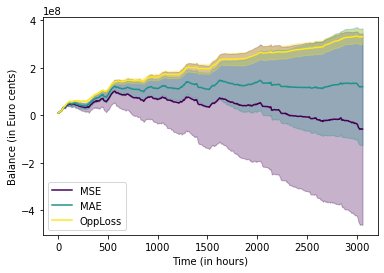

In [10]:
cmap = plt.get_cmap('viridis', len(res))
colors = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
legends = ['MSE', 'MAE', 'OppLoss_asymmetric']

fig = plt.figure()
for i,k in enumerate(res): 
    plt.plot(res[k]['mean_bal'], color=colors[i], label = legends[i])
    plt.fill_between(range(len(res[k]['mean_bal'])),
                 res[k]['mean_bal'] - res[k]['std_bal'], 
                 res[k]['mean_bal'] + res[k]['std_bal'],
                 color=colors[i], alpha=0.3)

plt.xlabel('Time (in hours)')
plt.ylabel('Balance (in Euro cents)')
plt.legend(loc='lower left')

plt.show() 

fig.savefig('results/visuals/compare_loss_balances_asymmetric' + PKL_NAME +'.jpg')